# Taxas de retorno e comparativos

## Imports

In [11]:
import pandas as pd
import numpy as np
import plotly.express as px

## Carregando os dados

In [12]:
dataset = pd.read_csv('acoes_ex.csv')
dataset.shape
dataset

,Date,ABEV,ODPV3.SA,VIV,PETR4.SA,BBAS3.SA,BOVA11.SA
0,2015-01-02,4.281933,5.826656,9.531738,2.779414,5.997846,47.259998
1,2015-01-05,4.202773,5.982119,9.337212,2.541857,5.873387,46.320000
2,2015-01-06,4.361095,5.938590,9.381674,2.458712,5.955478,46.580002
3,2015-01-07,4.433061,6.025646,9.603989,2.574522,6.217634,48.150002
4,2015-01-08,4.480106,6.006993,9.748498,2.740811,6.238819,48.509998
...,...,...,...,...,...,...,...
2532,2025-01-28,1.850000,11.130000,8.720000,37.130001,27.530001,121.029999
2533,2025-01-29,1.820000,11.020000,8.680000,36.900002,27.440001,120.169998
2534,2025-01-30,1.860000,11.290000,8.740000,37.389999,27.639999,123.949997
2535,2025-01-31,1.850000,11.300000,8.830000,37.689999,27.680000,123.000000


## Normalizando os dados

In [13]:
dataset_normalizado = dataset.copy()
for i in dataset_normalizado.columns[1:]:
    dataset_normalizado[i] = (dataset_normalizado[i] / dataset_normalizado[i][0])

dataset_normalizado    

,Date,ABEV,ODPV3.SA,VIV,PETR4.SA,BBAS3.SA,BOVA11.SA
0,2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2015-01-05,0.981513,1.026681,0.979592,0.914530,0.979249,0.980110
2,2015-01-06,1.018487,1.019211,0.984256,0.884615,0.992936,0.985612
3,2015-01-07,1.035294,1.034152,1.007580,0.926282,1.036644,1.018832
4,2015-01-08,1.046281,1.030950,1.022741,0.986111,1.040177,1.026449
...,...,...,...,...,...,...,...
2532,2025-01-28,0.432048,1.910186,0.914838,13.358933,4.589981,2.560940
2533,2025-01-29,0.425042,1.891308,0.910642,13.276182,4.574976,2.542742
2534,2025-01-30,0.434383,1.937646,0.916937,13.452477,4.608321,2.622725
2535,2025-01-31,0.432048,1.939363,0.926379,13.560413,4.614990,2.602624


In [14]:
(dataset['BOVA11.SA'][len(dataset) - 1] / dataset['BOVA11.SA'][0] -1) * 100

np.float64(159.79687503153016)

In [15]:
dataset['ABEV'].shift(1)

0            NaN
1       4.281933
2       4.202773
3       4.361095
4       4.433061
          ...   
2532    1.830000
2533    1.850000
2534    1.820000
2535    1.860000
2536    1.850000
Name: ABEV, Length: 2537, dtype: float64

In [16]:
for acao in dataset.columns[1:]:
    dataset[f'RS {acao}'] = (dataset[acao] / dataset[acao].shift(1)) - 1

dataset


,Date,ABEV,ODPV3.SA,VIV,PETR4.SA,BBAS3.SA,BOVA11.SA,RS ABEV,RS ODPV3.SA,RS VIV,RS PETR4.SA,RS BBAS3.SA,RS BOVA11.SA
0,2015-01-02,4.281933,5.826656,9.531738,2.779414,5.997846,47.259998,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-05,4.202773,5.982119,9.337212,2.541857,5.873387,46.320000,-0.018487,0.026681,-0.020408,-0.085470,-0.020751,-0.019890
2,2015-01-06,4.361095,5.938590,9.381674,2.458712,5.955478,46.580002,0.037671,-0.007277,0.004762,-0.032710,0.013977,0.005613
3,2015-01-07,4.433061,6.025646,9.603989,2.574522,6.217634,48.150002,0.016502,0.014659,0.023697,0.047102,0.044019,0.033705
4,2015-01-08,4.480106,6.006993,9.748498,2.740811,6.238819,48.509998,0.010612,-0.003096,0.015047,0.064591,0.003407,0.007477
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2532,2025-01-28,1.850000,11.130000,8.720000,37.130001,27.530001,121.029999,0.010929,0.006329,-0.014689,-0.001345,-0.006496,-0.006893
2533,2025-01-29,1.820000,11.020000,8.680000,36.900002,27.440001,120.169998,-0.016216,-0.009883,-0.004587,-0.006194,-0.003269,-0.007106
2534,2025-01-30,1.860000,11.290000,8.740000,37.389999,27.639999,123.949997,0.021978,0.024501,0.006912,0.013279,0.007289,0.031455
2535,2025-01-31,1.850000,11.300000,8.830000,37.689999,27.680000,123.000000,-0.005376,0.000886,0.010298,0.008024,0.001447,-0.007664


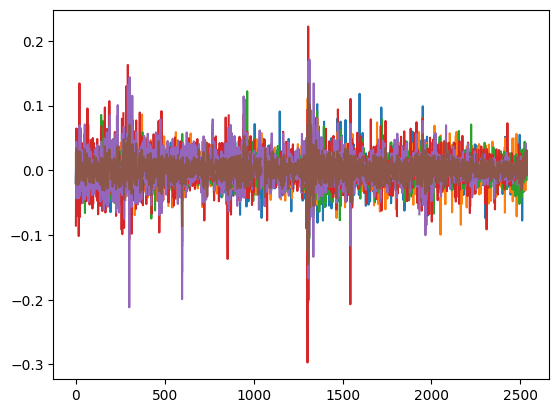

In [17]:
for acao in dataset.columns[7:]:
    dataset[acao].plot()

## Taxa de retorno anual

In [21]:
for acao in dataset.columns[7:]:
    print(f"{acao} {(dataset[acao].mean() * 246) * 100}")


RS ABEV -2.3991886697543143
RS ODPV3.SA 8.729511435798187
RS VIV 4.463306770292434
RS PETR4.SA 37.05510101416011
RS BBAS3.SA 23.95066484943352
RS BOVA11.SA 13.28362757609197


## Retorno da carteira

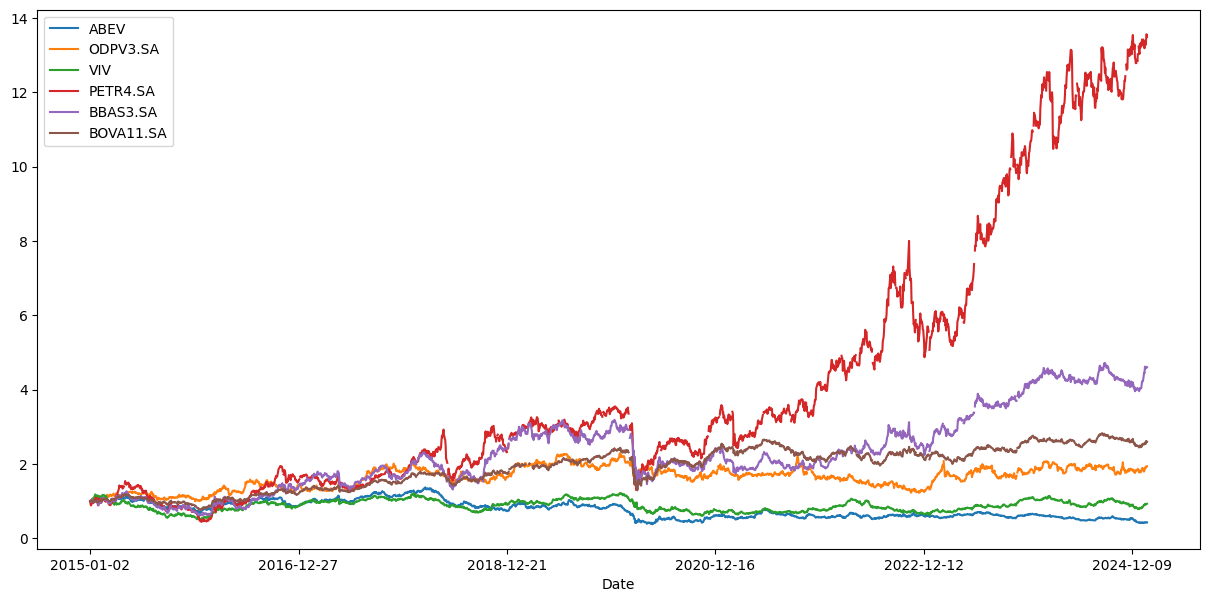

In [22]:
dataset_normalizado.plot(x = 'Date', figsize = (15, 7));

In [24]:
dataset_normalizado.drop(labels=['Date'], axis= 1, inplace=True)
dataset_normalizado

,ABEV,ODPV3.SA,VIV,PETR4.SA,BBAS3.SA,BOVA11.SA
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.981513,1.026681,0.979592,0.914530,0.979249,0.980110
2,1.018487,1.019211,0.984256,0.884615,0.992936,0.985612
3,1.035294,1.034152,1.007580,0.926282,1.036644,1.018832
4,1.046281,1.030950,1.022741,0.986111,1.040177,1.026449
...,...,...,...,...,...,...
2532,0.432048,1.910186,0.914838,13.358933,4.589981,2.560940
2533,0.425042,1.891308,0.910642,13.276182,4.574976,2.542742
2534,0.434383,1.937646,0.916937,13.452477,4.608321,2.622725
2535,0.432048,1.939363,0.926379,13.560413,4.614990,2.602624


In [26]:
retorno_carteira = (dataset_normalizado / dataset_normalizado.shift(1)) - 1
retorno_carteira.head()


,ABEV,ODPV3.SA,VIV,PETR4.SA,BBAS3.SA,BOVA11.SA
0,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.018487,0.026681,-0.020408,-0.085470,-0.020751,-0.019890
2,0.037671,-0.007277,0.004762,-0.032710,0.013977,0.005613
3,0.016502,0.014659,0.023697,0.047102,0.044019,0.033705
4,0.010612,-0.003096,0.015047,0.064591,0.003407,0.007477


In [29]:
retorno_anual = (retorno_carteira.mean() * 246) * 100
retorno_anual

ABEV         -2.399189
ODPV3.SA      8.729511
VIV           4.463307
PETR4.SA     37.055101
BBAS3.SA     23.950665
BOVA11.SA    13.283628
dtype: float64

## Carteira x IBOV

In [30]:
pesos_carteira1 = np.array([0.2, 0.2, 0.2, 0.2, 0.2, 0])
pesos_carteira1.sum()

np.float64(1.0)

In [31]:
np.dot(retorno_anual, pesos_carteira1)

np.float64(14.359879079985987)

In [61]:
dataset = pd.read_csv('acoes_ex.csv')

In [62]:
dataset_normalizado = dataset.copy()
for i in dataset_normalizado.columns[1:]:
    dataset_normalizado[i] = (dataset_normalizado[i] / dataset_normalizado[i][0])

dataset_normalizado.head()

,Date,ABEV,ODPV3.SA,VIV,PETR4.SA,BBAS3.SA,BOVA11.SA
0,2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2015-01-05,0.981513,1.026681,0.979592,0.914530,0.979249,0.980110
2,2015-01-06,1.018487,1.019211,0.984256,0.884615,0.992936,0.985612
3,2015-01-07,1.035294,1.034152,1.007580,0.926282,1.036644,1.018832
4,2015-01-08,1.046281,1.030950,1.022741,0.986111,1.040177,1.026449


In [69]:
dataset_normalizado['CARTEIRA'] = (dataset_normalizado['ABEV'] + dataset_normalizado['ODPV3.SA'] + dataset_normalizado['VIV'] + dataset_normalizado['PETR4.SA'] + dataset_normalizado['BBAS3.SA']) / 5
5
dataset_normalizado

,Date,ABEV,ODPV3.SA,VIV,PETR4.SA,BBAS3.SA,BOVA11.SA,CARTEIRA
0,2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2015-01-05,0.981513,1.026681,0.979592,0.914530,0.979249,0.980110,0.976313
2,2015-01-06,1.018487,1.019211,0.984256,0.884615,0.992936,0.985612,0.979901
3,2015-01-07,1.035294,1.034152,1.007580,0.926282,1.036644,1.018832,1.007990
4,2015-01-08,1.046281,1.030950,1.022741,0.986111,1.040177,1.026449,1.025252
...,...,...,...,...,...,...,...,...
2532,2025-01-28,0.432048,1.910186,0.914838,13.358933,4.589981,2.560940,4.241197
2533,2025-01-29,0.425042,1.891308,0.910642,13.276182,4.574976,2.542742,4.215630
2534,2025-01-30,0.434383,1.937646,0.916937,13.452477,4.608321,2.622725,4.269953
2535,2025-01-31,0.432048,1.939363,0.926379,13.560413,4.614990,2.602624,4.294639


In [68]:
figura = px.line(title = "Carteira x BOVA!!")
for i in dataset_normalizado.columns[1:]:
    figura.add_scatter(x = dataset_normalizado['Date'], y= dataset_normalizado[i], name = i)

figura.show()

In [70]:
dataset_normalizado.drop(['ABEV', 'ODPV3.SA', 'VIV', 'PETR4.SA', 'BBAS3.SA'], axis = 1, inplace=True)
dataset_normalizado

,Date,BOVA11.SA,CARTEIRA
0,2015-01-02,1.000000,1.000000
1,2015-01-05,0.980110,0.976313
2,2015-01-06,0.985612,0.979901
3,2015-01-07,1.018832,1.007990
4,2015-01-08,1.026449,1.025252
...,...,...,...
2532,2025-01-28,2.560940,4.241197
2533,2025-01-29,2.542742,4.215630
2534,2025-01-30,2.622725,4.269953
2535,2025-01-31,2.602624,4.294639


In [71]:
figura = px.line(title = "Carteira x BOVA!!")
for i in dataset_normalizado.columns[1:]:
    figura.add_scatter(x = dataset_normalizado['Date'], y= dataset_normalizado[i], name = i)

figura.show()